<a href="https://colab.research.google.com/github/Harshi-63/AI-Lab/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solution found in 14 moves.
Time taken: 0.0047 seconds


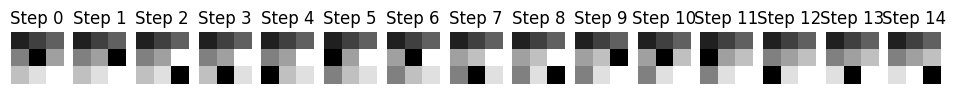

In [2]:
import heapq
import numpy as np
import matplotlib.pyplot as plt
import time

class Puzzle:
    def __init__(self, start, goal):
        self.start = tuple(start)
        self.goal = tuple(goal)
        self.n = int(len(start) ** 0.5)  # Grid size (3 for 8-puzzle)

    def heuristic(self, state, method="misplaced"):
        """ Compute heuristic value based on method."""
        state = np.array(state).reshape(self.n, self.n)
        goal = np.array(self.goal).reshape(self.n, self.n)

        if method == "misplaced":
            return np.sum(state != goal) - 1  # Exclude blank tile
        elif method == "manhattan":
            distance = 0
            for i in range(self.n):
                for j in range(self.n):
                    if state[i, j] != 0:
                        x, y = np.where(goal == state[i, j])
                        distance += abs(x[0] - i) + abs(y[0] - j)
            return distance
        return 0

    def get_neighbors(self, state):
        """ Generate possible moves from current state. """
        state = list(state)
        blank = state.index(0)
        x, y = divmod(blank, self.n)
        moves = []
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < self.n and 0 <= ny < self.n:
                new_state = state[:]
                new_blank = nx * self.n + ny
                new_state[blank], new_state[new_blank] = new_state[new_blank], new_state[blank]
                moves.append(tuple(new_state))

        return moves

    def a_star(self, heuristic="misplaced"):
        """ A* search algorithm. """
        open_set = []
        heapq.heappush(open_set, (0, self.start))
        came_from = {}
        g_score = {self.start: 0}
        f_score = {self.start: self.heuristic(self.start, heuristic)}

        while open_set:
            _, current = heapq.heappop(open_set)
            if current == self.goal:
                return self.reconstruct_path(came_from, current)

            for neighbor in self.get_neighbors(current):
                tentative_g = g_score[current] + 1
                if neighbor not in g_score or tentative_g < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score[neighbor] = tentative_g + self.heuristic(neighbor, heuristic)
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))

        return None  # No solution found

    def reconstruct_path(self, came_from, current):
        """ Reconstruct path from goal to start. """
        path = [current]
        while current in came_from:
            current = came_from[current]
            path.insert(0, current)
        return path

def visualize_solution(path):
    """ Visualize steps of solution. """
    plt.figure(figsize=(12, 6))
    for i, state in enumerate(path):
        plt.subplot(1, len(path), i + 1)
        plt.imshow(np.array(state).reshape(3, 3), cmap='gray', interpolation='nearest')
        plt.axis('off')
        plt.title(f"Step {i}")
    plt.show()

if __name__ == "__main__":
    start_state = [1, 2, 3, 4, 0, 5, 6, 7, 8]  # Initial state
    goal_state = [1, 2, 3, 4, 5, 6, 7, 8, 0]  # Goal state

    puzzle = Puzzle(start_state, goal_state)
    start_time = time.time()
    solution = puzzle.a_star("misplaced")
    end_time = time.time()

    if solution:
        print("Solution found in", len(solution) - 1, "moves.")
        print("Time taken:", round(end_time - start_time, 4), "seconds")
        visualize_solution(solution)
    else:
        print("No solution found.")
